#---EXPERIMENTAL--- (8 Maret 2025)

##Library

In [ ]:
!pip install tabulate

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert,lfilter, savgol_filter
from scipy.signal import find_peaks, peak_widths, chirp, argrelextrema, welch

##Importing Data

60.0
(60, 16384)
(60, 16384)


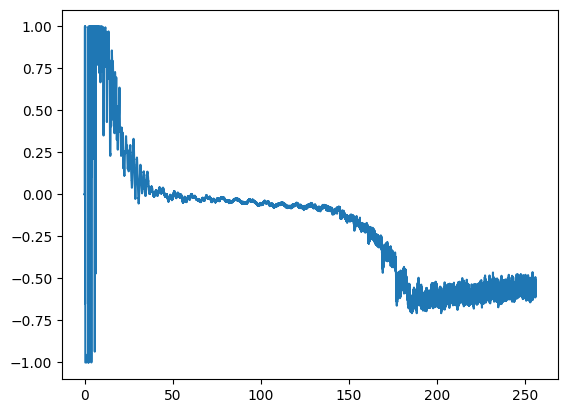

In [ ]:
import os
import numpy as np

# Path to the folder containing .npz files
folder_path = '/content/drive/MyDrive/Colab Notebooks/PLA03-12-24/'

# List all .npz files in the folder
npz_files = [f for f in os.listdir(folder_path) if f.endswith('.npz')]

# Load each .npz file
data_list = []
for file_name in npz_files:
    file_path = os.path.join(folder_path, file_name)
    data = np.load(file_path)
    data_list.append(data)

# Separate time and signal
data_time = []
data_signal = []
for i in range(len(data_list)):
  data_time.append(data_list[i]['t'])
  data_signal.append(data_list[i]['signal'].T.flatten())

# Data length inspection
data_len = 0
for i in range(len(data_list)):
  data_len = (data_len + len(data_list[i]))
  data_length = data_len / 15
print(data_length)
print(np.shape(data_time))
print(np.shape(data_signal))

# Full data visualization
plt.plot(data_time[1], data_signal[1])

##Bandpass Filter

<ipython-input-14-01cb91b013ca>:6: RuntimeWarning: overflow encountered in exp
  damped1 = i*(-np.exp(3*data_time[1]))
<ipython-input-14-01cb91b013ca>:7: RuntimeWarning: invalid value encountered in multiply
  damped2 = damped1*(np.exp(-3*data_time[1]))


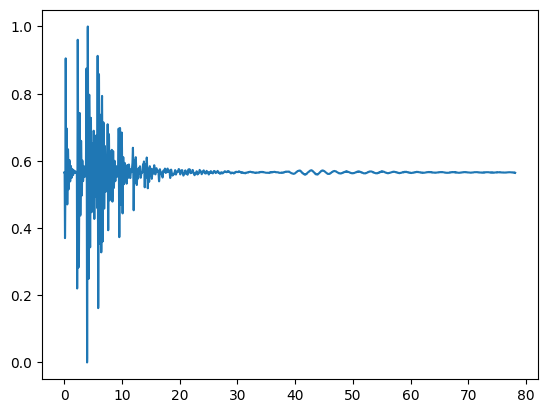

In [ ]:
# Data trimming and Damping

damped_signal = []
time = []
for i in data_signal:
  damped1 = i*(-np.exp(3*data_time[1]))
  damped2 = damped1*(np.exp(-3*data_time[1]))
  damped_signal.append(damped2[0:5000,])
for j in data_time:
  time.append(j[0:5000])
time = time[1]

# Bandpass

def min_max_normalize(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

def max_normalize(signal):
    return signal / np.max(np.abs(signal))

def butter_bandpass(lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    normal_low = lowcut / nyquist
    normal_high = highcut / nyquist
    b, a = butter(order, [normal_low, normal_high], btype='band')
    return b, a

def apply_bandpass_filter(signal, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

fs = 8*10**6
lowcut = 0.45*10**6
highcut = 0.55*10**6

# Bandpass Application
bandpass_signal = []
for i in damped_signal:
  bandpass_signal.append(apply_bandpass_filter(i, lowcut, highcut, fs, order=1))

# Scaler
def min_max_normalize(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Normalized
normalized_damped_signal = []
normalized_bandpass_signal = []
for i in damped_signal:
  normalized_damped_signal.append(min_max_normalize(i))
for j in bandpass_signal:
  normalized_bandpass_signal.append(min_max_normalize(j))

# Data Visualization
#plt.figure(figsize=(10,5))
#plt.subplot(2,1,1)
#plt.plot(time, normalized_damped_signal[59])
#plt.subplot(2,1,2)
plt.plot(time, normalized_bandpass_signal[59])

##Bandpass Validation

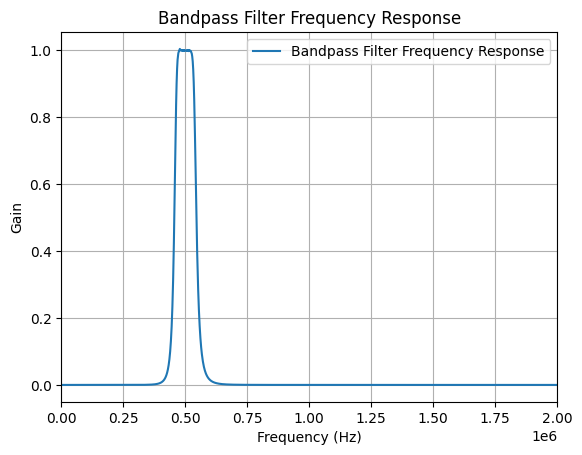

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Define the filter parameters
fs = 8 * 10**6
lowcut = 0.23 * 10**6
highcut = 0.27 * 10**6
order = 5

# Get the filter coefficients
b, a = butter_bandpass(lowcut, highcut, fs, order)

# Calculate the frequency response
w, h = freqz(b, a, worN=8000)

# Plot the frequency response
#plt.figure(figsize=(10, 5))
plt.plot((fs * w / np.pi), abs(h), label='Bandpass Filter Frequency Response')
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.xlim(0,2*10**6)
plt.ylabel('Gain')
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Function to find zero values in a list
def find_zero_values(snr_list, tolerance=1e-6):
    zero_indices = []
    for index, value in enumerate(snr_list):
        # Check if any element in the array is within the tolerance
        if np.any(np.abs(value) < tolerance):
            zero_indices.append(index)
    return zero_indices

# Example SNR lists (replace these with your actual SNR lists)
normalized_damped_signal
normalized_bandpass_signal

# Find zero values in the SNR lists
zero_normalized_damped_signal = find_zero_values(normalized_damped_signal, tolerance=1e-6)
zero_normalized_bandpass_signal = find_zero_values(normalized_bandpass_signal, tolerance=1e-6)

# Output the results
print("Zero values in normalized_damped_signal at indices:", zero_normalized_damped_signal)
print("Zero values in normalized_bandpass_signal at indices:", zero_normalized_bandpass_signal)

Zero values in normalized_damped_signal at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Zero values in normalized_bandpass_signal at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Noise calculation
noise = []
constant = 1e-6
for damped, bandpass in zip(normalized_damped_signal, normalized_bandpass_signal):
    noise.append(damped - bandpass + constant)

# SNR calculation
def snr(signal, noise):
    p_signal = np.sum(np.abs(signal)**2)
    p_noise = np.sum(np.abs(noise)**2)
    return 10 * np.log10(p_signal / p_noise)

snr_ori = [] #damped
snr_bandpass = []

# Calculate SNR for original damped signals
for damped, noise_part in zip(normalized_damped_signal, noise):
    snr_value = snr(damped, noise_part)
    snr_ori.append(snr_value)

# Calculate SNR for bandpass-filtered signals
for bandpass, noise_part in zip(normalized_bandpass_signal, noise):
    snr_value = snr(bandpass, noise_part)
    snr_bandpass.append(snr_value)

# Comparison
for snr1, snr2 in zip(snr_ori, snr_bandpass):
    if snr1 < snr2:
        print("Filtering valid")
        continue
    else:
        print("Not Valid")

# Debugging prints
print("SNR Original:", snr_ori)
print("SNR Bandpass:", snr_bandpass)

Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
Filtering valid
SNR Original: [6.017474892989043, 5.2356

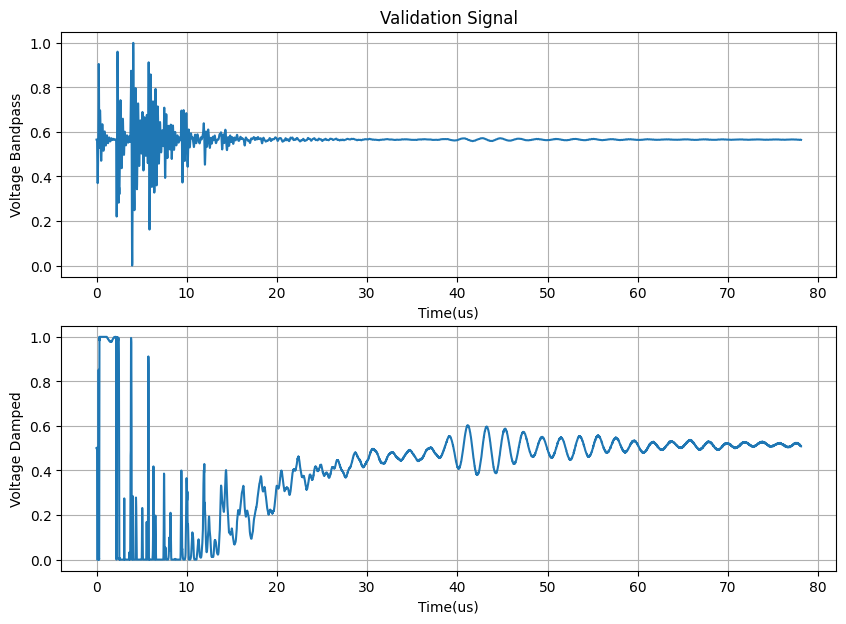

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.title("Validation Signal")
plt.xlabel("Time(us)")
plt.ylabel("Voltage Bandpass")
plt.plot(time, normalized_bandpass_signal[59])
plt.grid(True)
plt.subplot(2,1,2)
plt.xlabel("Time(us)")
plt.ylabel("Voltage Damped")
plt.plot(time, normalized_damped_signal[59])
plt.grid(True)
plt.show()

##Time Domain Analysis (Use Original Signal not Validation)

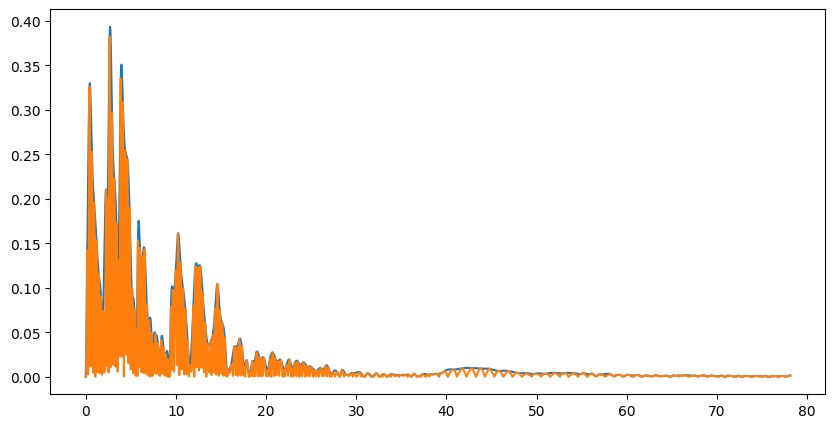

In [ ]:
time
rectification_signal = []
enveloped_signal = []
nd_enveloped_signal = []
for i in bandpass_signal:
  rectification_signal.append(np.abs(i))
for j in rectification_signal:
  envelope, ly = get_envelope_v1(time, j)
  enveloped_signal.append(envelope)

plt.figure(figsize=(10,5))
plt.plot (time, enveloped_signal[59])
plt.plot (time, rectification_signal[59])

In [ ]:
import os
import numpy as np

# Directory where you want to save the processed .npz files
env_output_folder = '/content/drive/MyDrive/Colab Notebooks/PLA03-12-24/New_Envelope_Transit'

# Ensure the output directory exists
os.makedirs(env_output_folder, exist_ok=True)

# Assuming enveloped_signal is a list of arrays
for index, signal in enumerate(enveloped_signal):
    # Check the shape of the signal before saving
    #print(f"Signal {index} shape before saving: {signal.shape}")

    # Define the file name for each signal
    file_name = f'enveloped_signal_{index}.npz'
    file_path = os.path.join(env_output_folder, file_name)

    # Save each signal to an individual .npz file
    np.savez_compressed(file_path, enveloped_signal=signal)

#print(f"Processed files saved to {env_output_folder}")

# List all .npz files in the folder
env_npz_files = [f for f in os.listdir(env_output_folder) if f.endswith('.npz')]

# Load each .npz file
env_data_list = []
for env_file_name in env_npz_files:
    env_file_path = os.path.join(env_output_folder, env_file_name)
    env_data = np.load(env_file_path)

    # Access the array correctly
    signal = env_data['enveloped_signal']
    env_data_list.append(signal)

    # Check the shape of the loaded signal
    #print(f"Loaded signal shape from {env_file_name}: {signal.shape}")

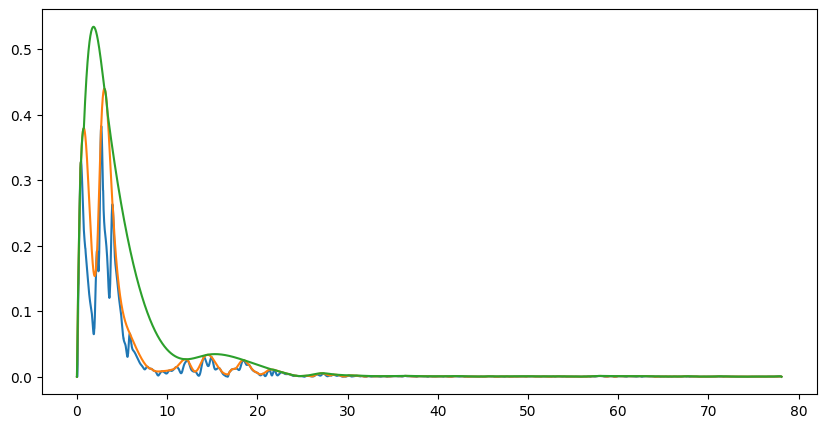

In [ ]:
envelope, ly = get_envelope_v1(time, env_data_list[0])
envelope2, ly = get_envelope_v1(time, envelope)

plt.figure(figsize=(10,5))
plt.plot(time, env_data_list[0])
plt.plot(time, envelope)
plt.plot(time, envelope2)

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_widths
from scipy.stats import skew, kurtosis
from tabulate import tabulate

# Assuming `envelope2` is your enveloped signal

# Amplitude-based features
max_amplitude = np.max(envelope2)
min_amplitude = np.min(envelope2)
mean_amplitude = np.mean(envelope2)
std_amplitude = np.std(envelope2)

# Temporal features
signal_length = len(envelope2)
time_to_peak = np.argmax(envelope2)

# Statistical features
skewness_value = skew(envelope2)
kurtosis_value = kurtosis(envelope2)

# Peak-related features
peaks3, _ = find_peaks(envelope2)
number_of_peaks = len(peaks3)
peak_widths_value = peak_widths(envelope2, peaks3, rel_height=0.5)
widths = peak_widths_value[0]
mean_width = np.mean(widths) if len(widths) > 0 else 0  # Calculate mean width

# Energy-based features
total_energy = np.sum(envelope2**2)

# Shape-based features
zero_crossing_rate = np.sum(np.diff(envelope2 > 0))
envelope_area = np.trapz(envelope2)

# Attenuation calculation
initial_amplitude = envelope2[peaks3][0]  # Assuming the first point is the initial amplitude
final_amplitude = envelope2[peaks3][1]  # Assuming the last point is the final amplitude
attenuation_db = 20 * np.log10(initial_amplitude / final_amplitude) if final_amplitude != 0 else float('inf')

# Collect features into a dictionary with descriptive names
features = {
    'Feature': [
        'Max Amplitude', 'Min Amplitude', 'Mean Amplitude', 'Std Amplitude',
        'Signal Length', 'Time to Peak', 'Skewness', 'Kurtosis',
        'Number of Peaks', 'Total Energy', 'Zero Crossing Rate', 'Envelope Area', 'Mean Envelope Widths', 'Attenuation (dB)'
    ],
    'Value': [
        max_amplitude, min_amplitude, mean_amplitude, std_amplitude,
        signal_length, time_to_peak, skewness_value, kurtosis_value,
        number_of_peaks, total_energy, zero_crossing_rate, envelope_area, mean_width, attenuation_db
    ]
}

# Create a DataFrame
df_features = pd.DataFrame(features)

# Display the DataFrame as a table using tabulate
print(tabulate(df_features, headers='keys', tablefmt='grid', floatfmt=".3f", showindex=False))

+----------------------+----------+
| Feature              |    Value |
+======================+==========+
| Max Amplitude        |    0.534 |
+----------------------+----------+
| Min Amplitude        |    0.000 |
+----------------------+----------+
| Mean Amplitude       |    0.038 |
+----------------------+----------+
| Std Amplitude        |    0.104 |
+----------------------+----------+
| Signal Length        | 5000.000 |
+----------------------+----------+
| Time to Peak         |  118.000 |
+----------------------+----------+
| Skewness             |    3.398 |
+----------------------+----------+
| Kurtosis             |   10.894 |
+----------------------+----------+
| Number of Peaks      |   19.000 |
+----------------------+----------+
| Total Energy         |   61.401 |
+----------------------+----------+
| Zero Crossing Rate   |    1.000 |
+----------------------+----------+
| Envelope Area        |  192.181 |
+----------------------+----------+
| Mean Envelope Widths |  11

In [ ]:
peaks, _ = find_peaks(envelope2)
results_half1 = peak_widths(envelope2, peaks, rel_height=0.5)
# x-Axis
results_half1[0]#[:1]  # widths
results_full1 = peak_widths(envelope2, peaks, rel_height=1)
results_full1[0]#[:1] # widths

array([4998.99308905,  389.39019312,  501.45119938,  228.85353586,
        225.47452592,  227.10313047,   58.34437588,  679.66677212,
         88.97773588,  199.04685801,  880.97841187,   38.89836119,
        135.70297652,  104.95694152,  135.14032977,  205.93759806,
         93.01298188,   64.45747982,  260.96593569])

In [ ]:
# Get y-values of the peaks
peak_amplitudes = envelope2[peaks]
print(peak_amplitudes)
print(peaks)

[5.33877069e-01 3.45660333e-02 5.41427429e-03 1.42502341e-03
 1.04577065e-03 8.04219252e-04 6.07724499e-04 8.45729915e-04
 6.97598168e-04 7.13252508e-04 1.31543588e-03 1.01382449e-03
 1.05490524e-03 6.07378448e-04 9.05014924e-04 7.79964503e-04
 3.86826527e-04 4.08273226e-04 8.39140246e-04]
[ 118  980 1742 2332 2692 2918 3024 3203 3322 3429 3720 3837 3997 4223
 4329 4564 4802 4906 4979]


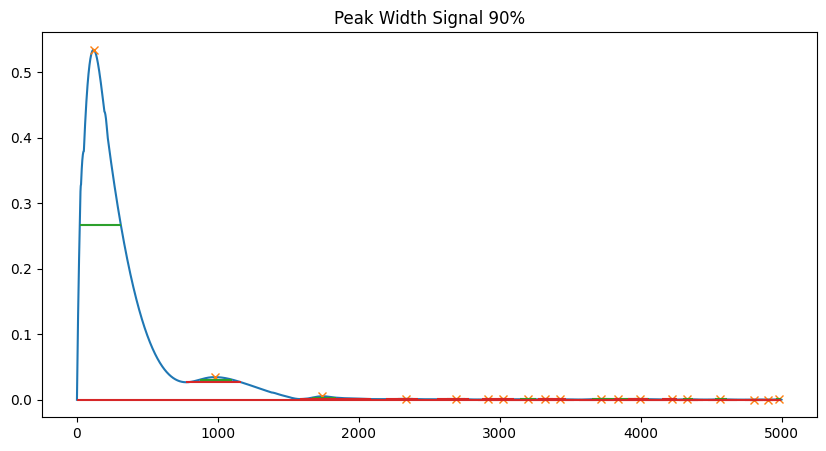

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(envelope2)
plt.title("Peak Width Signal 90%")
plt.plot(peaks, envelope2[peaks], "x")
plt.hlines(*results_half1[1:][:6], color="C2")
plt.hlines(*results_full1[1:][:6], color="C3")
plt.show()

##Frequency Domain Analysis

     PSD  FFT
0   2.40   45
1   1.87   38
2   3.00   46
3   1.66   37
4   3.19   47
5   2.63   45
6   2.27   44
7   1.29   38
8   2.18   40
9   4.17   47
10  3.81   50
11  2.00   42
12  0.89   32
13  2.75   41
14  1.67   40
15  3.01   43
16  1.18   34
17  0.72   32
18  2.04   45
19  0.78   32


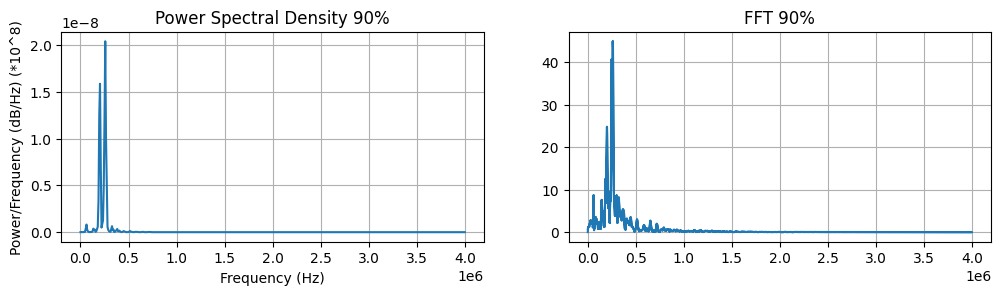

In [ ]:
fft_signal = []
freq_fft = []
freqacq = 8*10**6
for i in bandpass_signal:
  fft_signal.append(np.fft.fft(i))
  freq_fft.append(np.fft.fftfreq(len(i), d=1/freqacq))
abs_fft = np.abs(fft_signal)
abs_freqspace = np.abs(freq_fft)

psd_signal = []
for i in bandpass_signal:
  freq, psd = welch(i, freqacq, nperseg=1024)
  psd_signal.append(psd)

magnitude = [] # convert imaginer value within int
integer = [] # converted imaginer value into int
max_value_psd =[]
max_value_fft =[]
max_value_fft_imag = []

for i in range(len(psd_signal)):
  if (5 <= i <= 9 or 20 <= i <= 24 or 35 <= i <= 39 or 50 <= i <=54):
    rounded_psd = np.round(psd_signal[i], decimals = 10)
    max_value_psd.append(max(rounded_psd)*10**8)
  else:
    continue
for j in range(len(fft_signal)):
  if 5 <= j <= 9 or 20 <= j <= 24 or 35 <= j <= 39 or 50 <= j <= 54:
    magnitude = np.abs(fft_signal[j])
    integer_magnitude = np.round(magnitude).astype(int)
    max_value_fft.append(max(integer_magnitude))
  else:
    continue

data_max_value_psd = pd.DataFrame(max_value_psd, columns=['PSD'])
data_max_value_fft = pd.DataFrame(max_value_fft, columns=['FFT'])

frequency_data = pd.concat([data_max_value_psd, data_max_value_fft], axis=1)

print(frequency_data)

# Data Visualization
plt.figure(figsize=(12,6))
# Plot the PSD
plt.subplot(2,2,1)
plt.plot(freq, psd_signal[53])
plt.title("Power Spectral Density 90%")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz) (*10^8)")
plt.grid(True)
# Get the corresponding frequencies
plt.subplot(2,2,2)
plt.plot(abs_freqspace[59], abs_fft[59])
plt.title("FFT 90%")
plt.grid(True)

# Uncomment to save to CSV if needed
# frequency_data.to_csv('frequency_data.csv', index=False)